In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
reviews_originale = pd.read_json(r"C:\Users\Alessandro\Desktop\CDs_and_Vinyl.jsonl", lines = True) ## Importo il dataset delle reviews scaricato

In [7]:
reviews_originale

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Five Stars,LOVE IT!,[],B002MW50JA,B002MW50JA,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 02:06:17.000,0,True
1,5,Five Stars,LOVE!!,[],B008XNPN0S,B008XNPN0S,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 02:06:04.000,0,True
2,3,Three Stars,Sad there is not the versions with the real/or...,[],B00IKM5N02,B00IKM5N02,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 01:51:25.000,0,True
3,3,Disappointed,I have listen to The Broadway 1958 Flower Drum...,[],B00006JKCM,B00006JKCM,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2006-11-20 15:34:24.000,3,True
4,5,Wonderful melding,Simply great album. One of the best. Marvelous...,[],B00013YRQY,B00013YRQY,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,2020-02-19 05:29:59.946,0,False
...,...,...,...,...,...,...,...,...,...,...
4827268,5,good cd,I love this cd and love the movie thank u I ha...,[],B000002VPH,B000002VPH,AHM36UEBOF2I6VH7CGAGHCDDUITQ,2011-06-18 16:06:15.000,0,True
4827269,5,hot cd,I love the cd it play real well and was delive...,[],B000084T18,B000084T18,AHM36UEBOF2I6VH7CGAGHCDDUITQ,2011-06-18 16:01:15.000,0,True
4827270,5,Superb sounding remaster,Such a great remaster you can fully appreciate...,[],B004OFWLO0,B004OFWLO0,AHRJPHOI5JHYEQVSDMNX6736QH3Q,2017-09-14 21:45:59.120,1,True
4827271,1,"Very, very disappointing.",What this CD is lacking is a heart. The music...,[],B000GIXIAK,B000GIXIAK,AH4PJ73QN75AJM5VSCT53AOADCGA,2006-09-05 15:28:30.000,6,False


In [9]:
reviews_originale.dtypes

rating                        int64
title                        object
text                         object
images                       object
asin                         object
parent_asin                  object
user_id                      object
timestamp            datetime64[ns]
helpful_vote                  int64
verified_purchase              bool
dtype: object

In [11]:
reviews_originale = reviews_originale[['user_id', 'parent_asin', 'rating']]
reviews_originale

,user_id,parent_asin,rating
0,AGKASBHYZPGTEPO6LWZPVJWB2BVA,B002MW50JA,5
1,AGKASBHYZPGTEPO6LWZPVJWB2BVA,B008XNPN0S,5
2,AGKASBHYZPGTEPO6LWZPVJWB2BVA,B00IKM5N02,3
3,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,B00006JKCM,3
4,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,B00013YRQY,5
...,...,...,...
4827268,AHM36UEBOF2I6VH7CGAGHCDDUITQ,B000002VPH,5
4827269,AHM36UEBOF2I6VH7CGAGHCDDUITQ,B000084T18,5
4827270,AHRJPHOI5JHYEQVSDMNX6736QH3Q,B004OFWLO0,5
4827271,AH4PJ73QN75AJM5VSCT53AOADCGA,B000GIXIAK,1


In [13]:
numero_recensioni = reviews_originale.shape[0]
numero_utenti_originale = reviews_originale['user_id'].nunique()
numero_prodotti_originale = reviews_originale['parent_asin'].nunique()
print(f'Numero di recensioni: {numero_recensioni} | Numero di utenti: {numero_utenti_originale} | Numero di prodotti: {numero_prodotti_originale}')

Numero di recensioni: 4827273 | Numero di utenti: 1754118 | Numero di prodotti: 701673


In [15]:
## Percentuale degli utenti che hanno meno di k recensioni rispetto al totale
utenti_counts = reviews_originale['user_id'].value_counts()
item_counts = reviews_originale['parent_asin'].value_counts()

utenti_meno_di_10_recensioni = utenti_counts[utenti_counts <= 10]
items_meno_di_10_recensioni = item_counts[item_counts <= 10]

percentuale_utenti_poche_recensioni = ((len(utenti_meno_di_10_recensioni) * 100) / numero_utenti_originale)
percentuale_prodotti_poche_recensioni = ((len(items_meno_di_10_recensioni) * 100) / numero_prodotti_originale)

print(f'{percentuale_utenti_poche_recensioni:.2f}% degli utenti hanno meno di 10 recensioni')
print(f'{percentuale_prodotti_poche_recensioni:.2f}% dei prodotti sono stati recensiti meno di 10 volte')

96.63% degli utenti hanno meno di 10 recensioni
88.61% dei prodotti sono stati recensiti meno di 10 volte


In [17]:
dt_originale = reviews_originale
while True:
    utenti_counts = dt_originale['user_id'].value_counts()
    item_counts = dt_originale['parent_asin'].value_counts()
    
    utenti_minimo_18_recensioni = utenti_counts[utenti_counts >= 18].index
    items_minimo_15_recensioni = item_counts[item_counts >= 15].index

    dataset_filtrato = dt_originale[(dt_originale['user_id'].isin(utenti_minimo_18_recensioni)) & 
                                   (dt_originale['parent_asin'].isin(items_minimo_15_recensioni))].reset_index(drop = True)
    if dataset_filtrato.shape[0] == dt_originale.shape[0]:
        break
    dt_originale = dataset_filtrato

In [19]:
dataset_filtrato

,user_id,parent_asin,rating
0,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B00MA7GABO,5
1,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B000002IAI,3
2,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B000002LJZ,3
3,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B000002J0N,4
4,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B00000ICNY,5
...,...,...,...
105578,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B0000CG8F8,4
105579,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B00008XS49,5
105580,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B00006IU73,5
105581,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B000066HQC,5


In [21]:
numero_recensioni = dataset_filtrato.shape[0]
numero_utenti_originale = dataset_filtrato['user_id'].nunique()
numero_prodotti_originale = dataset_filtrato['parent_asin'].nunique()
print(f'Numero di recensioni: {numero_recensioni} | Numero di utenti: {numero_utenti_originale} | Numero di prodotti: {numero_prodotti_originale}')

Numero di recensioni: 105583 | Numero di utenti: 2685 | Numero di prodotti: 3444


In [23]:
## Vediamo che non ci sono valori mancanti dentro il mio dataset
dataset_filtrato.isnull().sum()

user_id        0
parent_asin    0
rating         0
dtype: int64

In [25]:
dataset_filtrato.head()

,user_id,parent_asin,rating
0,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B00MA7GABO,5
1,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B000002IAI,3
2,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B000002LJZ,3
3,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B000002J0N,4
4,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B00000ICNY,5


In [27]:
dataset_filtrato.tail()

,user_id,parent_asin,rating
105578,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B0000CG8F8,4
105579,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B00008XS49,5
105580,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B00006IU73,5
105581,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B000066HQC,5
105582,AEZ6E3LXEHS5V5W5ARGQU2GVXBZA,B00000JZC4,5


In [29]:
dataset_filtrato.sample(5)

,user_id,parent_asin,rating
57075,AHPAPKPYPOKPJNBR7HFGZFSR2KTQ,B00006AW2S,5
92635,AGWDGNZXSBU3VRAIPIGHZV5MRLNA,B0002TLJEK,4
100997,AFCWK7ARVJSAG7QRDFGZEJJJ4MYQ,B000IOM0YM,4
83032,AFKKZCCEOJS4QQVOT6IW23KBCKNA,B00006LWPU,4
31736,AGAKV2IAD5E3UE336W2LNQDLAV4Q,B000002H70,5


In [31]:
dataset_filtrato.dtypes

user_id        object
parent_asin    object
rating          int64
dtype: object

In [33]:
# Analisi Esplorativa (Statistiche descrittive, Analisi Correllazione)

Text(0, 0.5, '')

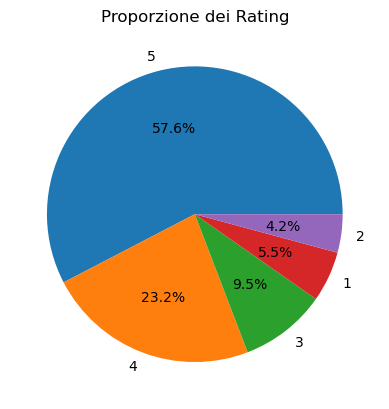

In [35]:
## Proporzione dei ratings
## Ci possiamo rendere conto che la maggior parte degli utenti ha recensito ai diversi prodotti con una valutazione di 5 
## Ci possiamo rendere anche conto che il rating meno frequente e' il "2" cio' vuol dire che i prodotti della categoria di CD's e vinili sono stati accolti in maniera positiva dagli utenti 
proporzione_ratings = dataset_filtrato.rating.value_counts(normalize = True) * 100
proporzione_ratings.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporzione dei Rating')
plt.ylabel('')  

In [37]:
rating_medio_per_prodotto = dataset_filtrato.groupby('parent_asin').rating.mean()
count_prodotti_rating_5 = len(rating_medio_per_prodotto[rating_medio_per_prodotto == 5])
count_prodotti_rating_1 = len(rating_medio_per_prodotto[rating_medio_per_prodotto == 1])

print(f'Numero di prodotti con media dei rating maggiore: {count_prodotti_rating_5}')
print(f'Numero di prodotti con media dei rating minore: {count_prodotti_rating_1}')

prodotti_rating_5 = rating_medio_per_prodotto[rating_medio_per_prodotto == 5]
prodotti_rating_1 = rating_medio_per_prodotto[rating_medio_per_prodotto == 1]

print(f'Prodotto con rating medio maggiore:\n{prodotti_rating_5}')
print(f'Prodotto con rating medio minore:\n{prodotti_rating_1}')

Numero di prodotti con media dei rating maggiore: 14
Numero di prodotti con media dei rating minore: 1
Prodotto con rating medio maggiore:
parent_asin
B0000009SM    5.0
B000000XDJ    5.0
B000002MZ4    5.0
B000002U9E    5.0
B000003CM9    5.0
B000003CMA    5.0
B000005H7D    5.0
B000006NUW    5.0
B000050IE6    5.0
B0002LE9HC    5.0
B00FEDP65W    5.0
B00MNCW0SS    5.0
B00UN9PP44    5.0
B06WGVMLJY    5.0
Name: rating, dtype: float64
Prodotto con rating medio minore:
parent_asin
B000G04RLM    1.0
Name: rating, dtype: float64


In [39]:
## Il prodotto accolto negativamente dagli utenti e' stato il prodotto B000G04RLM con una media di 1.0 
## Invece ci sono 14 prodotti con la media piu' alta dei rating con una media di 5.0 massima scala

In [41]:
rating_medio_per_utente = dataset_filtrato.groupby('user_id').rating.mean()
count_utenti_rating_5 = len(rating_medio_per_utente[rating_medio_per_utente == 5])
count_utenti_rating_1 = len(rating_medio_per_utente[rating_medio_per_utente == 1])

print(f'Numero di utenti con media dei rating maggiore: {count_utenti_rating_5}')
print(f'Numero di utenti con media dei rating minore: {count_utenti_rating_1}')

utenti_rating_5 = rating_medio_per_utente[rating_medio_per_utente == 5]
utenti_rating_1 = rating_medio_per_utente[rating_medio_per_utente == 1]

print(f'Utenti con rating medio maggiore: \n{utenti_rating_5}')
print(f'Utenti con rating medio minore: \n{utenti_rating_1}')

Numero di utenti con media dei rating maggiore: 227
Numero di utenti con media dei rating minore: 1
Utenti con rating medio maggiore: 
user_id
AE2L54LBHP2INCTEHGS7IEAFQJIA    5.0
AE2VL4MFADV5N5OPACNDEYXL5L3Q    5.0
AE32INSVRFOUVTTXAAY3E6VXFUQA    5.0
AE3VHCBC7227XMHPVIQ347LHGRRA    5.0
AE4RVV2JGTZ552LBD4S2TZBS6B5A    5.0
                               ... 
AHXN7CX6JMNL4VAK4PMY5CLCEJQQ    5.0
AHXXJGAQRPKSRIV7QXYMIEGYOMMQ    5.0
AHYLAMO4CW7LWZL462DAS6SAMIEQ    5.0
AHYMX2J3AMQILKLQ3KX7M355WDBQ    5.0
AHZFWGWVWMWUYWERL72QHZSY7DBQ    5.0
Name: rating, Length: 227, dtype: float64
Utenti con rating medio minore: 
user_id
AFGNRMK2UDSWVDQBNUNTYHNBAN3Q    1.0
Name: rating, dtype: float64


In [43]:
## Ci rendiamo conto che l'utente AFGNRMK2UDSWVDQBNUNTYHNBAN3Q ha recensito negativamente piu' prodotti che chiunque altro
## quindi possiamo dire che il medesimo utente e' piu' probabile che recensioni negativamente anche ad altri prodotti
## Invece abbiamo 227 utenti che hanno recensito positivamente (al massimo) piu' prodotti

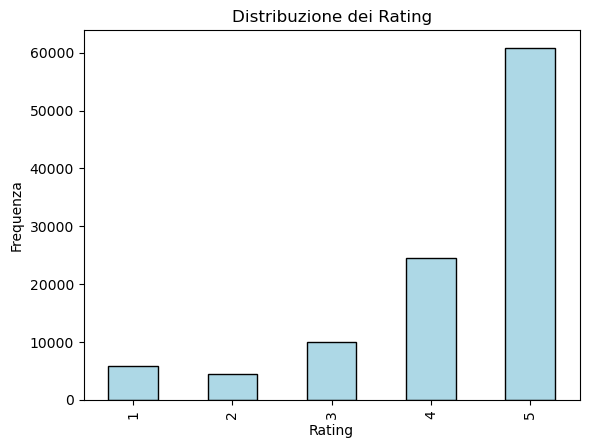

In [45]:
frequenza_ratings = dataset_filtrato['rating'].value_counts()
frequenza_ratings.sort_index().plot(kind='bar', color='lightblue', edgecolor='k')
plt.title('Distribuzione dei Rating')
plt.xlabel('Rating')
plt.ylabel('Frequenza')
plt.show()

In [47]:
dataset_filtrato.describe()

,rating
count,105583.000000
mean,4.232035
std,1.132306
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: >

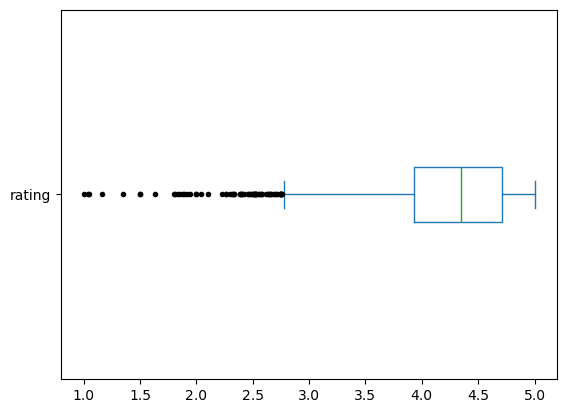

In [49]:
p = dataset_filtrato.groupby('user_id').rating.mean()
p.plot.box(vert = False, sym = 'k.')

In [51]:
p = dataset_filtrato['parent_asin'].value_counts()
prodotti_piu_recensiti = p.head(10)
prodotti_piu_recensiti

parent_asin
B00008OWZG    220
B000002H97    205
B000002H33    198
B000002J09    194
B000002UB3    190
B00004ZAV3    184
B000089RVX    184
B000002U82    179
B0002OERI0    178
B000002UAU    175
Name: count, dtype: int64

In [53]:
from surprise import Dataset, Reader
from surprise import accuracy, KNNBasic
from surprise import model_selection

In [55]:
reader = Reader(rating_scale = (1, 5))
dataset_surprise = Dataset.load_from_df(dataset_filtrato, reader)

In [56]:
algo = KNNBasic()
trainset, testset = model_selection.train_test_split(dataset_surprise, test_size = 0.2, random_state = 1)

In [59]:
algo.fit(trainset)
predictions = algo.test(testset)
mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9591
RMSE: 0.9794


In [61]:
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold 

In [71]:
mse_over_k, rmse_over_k = [], []
for k in np.arange(5, 41, 5):
    print(f'Trying k = {k}...')
    algo = KNNBasic(k = k, verbose = False)
    kfold_result = cross_validate(algo, dataset_surprise, cv = 5, measures = ['mse', 'rmse'], verbose = False)
    mse_over_k.append(kfold_result['test_mse'].mean())
    rmse_over_k.append(kfold_result['test_rmse'].mean())

Trying k = 5...
Trying k = 10...
Trying k = 15...
Trying k = 20...
Trying k = 25...
Trying k = 30...
Trying k = 35...
Trying k = 40...


In [73]:
print(f'Valori del mse: {mse_over_k}\n Valori del rmse: {rmse_over_k}')

Valori del mse: [1.0123362691821205, 0.9515871476606295, 0.9492108403914197, 0.9503758142975572, 0.9501314419557139, 0.9553524635936123, 0.9544870060351599, 0.9601217029925939]
 Valori del rmse: [1.0061441630247199, 0.9754724255335188, 0.9742241567493926, 0.9748605128217639, 0.9747365286960514, 0.9774048736126151, 0.976971010522497, 0.979852498538123]


Best k = 15


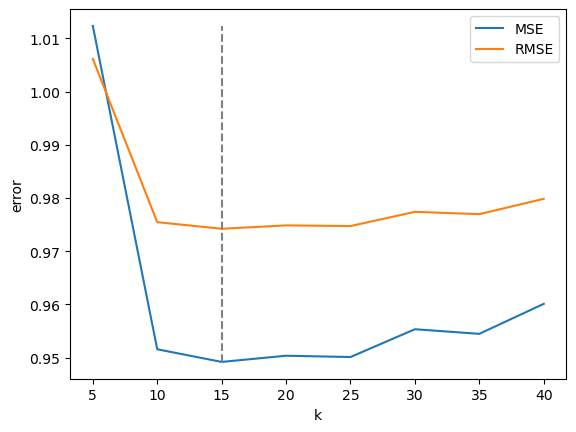

In [75]:
ks = np.arange(5, 41, 5)
print(f'Best k = {ks[np.argmin(rmse_over_k)]}')
plt.plot(ks, mse_over_k, label='MSE')
plt.plot(ks, rmse_over_k, label='RMSE')
plt.vlines(x=ks[np.argmin(rmse_over_k)], ymin=np.min(mse_over_k), ymax=np.max(mse_over_k),
           linestyle='--', color='grey')
plt.xlabel('k')
plt.ylabel('error')
plt.legend();

In [77]:
param_grid = {
    'k': list(range(15, 41)),
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [True, False],
    },
}
gs = model_selection.GridSearchCV(KNNBasic, param_grid,
                                  measures=["rmse", "mse"],
                                  cv=5,
                                  n_jobs=-1)
gs.fit(dataset_surprise)

In [79]:
# best RMSE score
print(f'Best MSE = {gs.best_score['mse']:.4f}')
print(f'Best RMSE = {gs.best_score["rmse"]:.4f}')
# combination of parameters that gave the best RMSE score
print(f'Best configuration = {gs.best_params["rmse"]}')

Best MSE = 0.8623
Best RMSE = 0.9286
Best configuration = {'k': 24, 'sim_options': {'name': 'msd', 'user_based': False}}


In [95]:
trainset = dataset_surprise.build_full_trainset()

algo = KNNBasic(k = 24, sim_options = {'name': 'msd', 'user_based': False})
algo.fit(trainset);

Computing the msd similarity matrix...
Done computing similarity matrix.


In [83]:
# Creare il rating_matrix_originale
users_id = dataset_filtrato["user_id"].unique()
items_id = dataset_filtrato["parent_asin"].unique()
matrice_ratings_filtrato = pd.DataFrame(0, index = users_id, columns = items_id)

for row in dataset_filtrato.itertuples():
    matrice_ratings_filtrato.at[row.user_id, row.parent_asin] = row.rating


In [85]:
matrice_ratings_filtrato

,B00MA7GABO,B000002IAI,B000002LJZ,B000002J0N,B00000ICNY,B01BGDXOFC,B0034CNSFU,B000NY17J6,B015EYVWPI,B000026C3T,...,B000002I6T,B000068TND,B000BJS4P8,B0000B3FCX,B0000060ZW,B00000JJ2R,B0000009T2,B000WCDI6O,B000000OW6,B000003C4I
AE7BV6IMNPZ3F266H7PXMH3BZQNQ,5,3,3,4,5,4,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0
AGTMZCWIWBH43TCW7UKG2YV2EKKA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGWDYYVVWM3DC3CASUZKXK67G6IA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGQCLGY54KOYF7D7A5W7K46JQHXQ,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE5VPKX64CVOPH6X75C7EQXAIGLA,0,3,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHYIIJI6TNWY6W3MIEJZOADB4LWQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AEV4BTCQALPMAIO4SSZVKNQZ3MQQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE75T3R6KTKQI6OJH5QMOGLXUZ2A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG2TRQF2I5XIVFV367JTJ7IUN6XQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
#Predire tutti i prodotti per un user especifico
uid = 'AGTMZCWIWBH43TCW7UKG2YV2EKKA'
items_id = dataset_filtrato['parent_asin'].unique()
items_pred = []
for iid in items_id:
    if matrice_ratings_filtrato.at[uid, iid] > 0 :
        items_pred.append(0)
    else:
        res = algo.predict(uid = uid, iid = iid)
        items_pred.append(res.est)
        
items_pred = np.array(items_pred)

In [239]:
items_id

array(['B00MA7GABO', 'B000002IAI', 'B000002LJZ', ..., 'B000WCDI6O',
       'B000000OW6', 'B000003C4I'], dtype=object)

In [241]:
items_pred

array([4.49295775, 4.93548387, 4.65806452, ..., 4.60429483, 1.        ,
       4.94444444])

In [243]:
idxs_sorted = np.argsort(items_pred)
idxs_sorted = idxs_sorted[::-1] 
items_pred = items_pred[idxs_sorted] 
rec_list = items_id[idxs_sorted]  

print(f"Top 10 items recommended: {rec_list[:10]}")
print(f"Scores: {items_pred[:10]}")

Top 10 items recommended: ['B000001DYA' 'B000002B7U' 'B06Y4BX6FS' 'B0000009SM' 'B0000009RT'
 'B000001FK4' 'B000051Y2R' 'B000002YAI' 'B000002IAM' 'B0026J8LHM']
Scores: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [245]:
# Associate the ids to the titles
print(f"Recommendations for user with id={uid}:\n")
for i, iid in enumerate(rec_list[:10]):
  title = dataset_filtrato.loc[dataset_filtrato["parent_asin"] == iid, "parent_asin"].values[0]
  print(f"{i + 1}. [s={items_pred[i]:.2f}] {title}")

Recommendations for user with id=AGTMZCWIWBH43TCW7UKG2YV2EKKA:

1. [s=5.00] B000001DYA
2. [s=5.00] B000002B7U
3. [s=5.00] B06Y4BX6FS
4. [s=5.00] B0000009SM
5. [s=5.00] B0000009RT
6. [s=5.00] B000001FK4
7. [s=5.00] B000051Y2R
8. [s=5.00] B000002YAI
9. [s=5.00] B000002IAM
10. [s=5.00] B0026J8LHM


In [267]:
# Filling dei rating mancanti nella matrice di rating 
users_id = dataset_filtrato["user_id"].unique()
items_id = dataset_filtrato["parent_asin"].unique()
filled_rating_matrix = []
for uid in users_id:
  filled_rating_matrix.append([])
  for iid in items_id:
      if matrice_ratings_filtrato.at[uid, iid] > 0 :
        filled_rating_matrix[-1].append(0)
      else:
          res = algo.predict(uid=uid, iid=iid)
          filled_rating_matrix[-1].append(res.est)

filled_rating_matrix = np.array(filled_rating_matrix)

In [269]:
res_df = pd.DataFrame(filled_rating_matrix)
res_df.columns = items_id
res_df = res_df.set_index(users_id)
res_df

,B00MA7GABO,B000002IAI,B000002LJZ,B000002J0N,B00000ICNY,B01BGDXOFC,B0034CNSFU,B000NY17J6,B015EYVWPI,B000026C3T,...,B000002I6T,B000068TND,B000BJS4P8,B0000B3FCX,B0000060ZW,B00000JJ2R,B0000009T2,B000WCDI6O,B000000OW6,B000003C4I
AE7BV6IMNPZ3F266H7PXMH3BZQNQ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.538462,4.232035,4.232035,4.000000,4.232035,4.600000,4.081967,5.000000,4.232035,5.000000
AGTMZCWIWBH43TCW7UKG2YV2EKKA,4.492958,4.935484,4.658065,4.444444,4.634106,4.712871,4.333333,4.770817,4.500000,4.509677,...,4.083333,4.577778,4.529119,4.574885,4.500000,4.666667,4.666667,4.604295,1.000000,4.944444
AGWDYYVVWM3DC3CASUZKXK67G6IA,4.833333,4.843750,4.823529,5.000000,4.939577,5.000000,5.000000,5.000000,5.000000,4.892857,...,5.000000,5.000000,5.000000,5.000000,4.232035,5.000000,4.909091,5.000000,5.000000,5.000000
AGQCLGY54KOYF7D7A5W7K46JQHXQ,5.000000,4.930071,5.000000,4.923492,4.969558,5.000000,0.000000,4.926186,4.847458,4.942693,...,5.000000,5.000000,4.661538,4.415880,4.807692,5.000000,4.900782,4.875000,4.400000,4.873159
AE5VPKX64CVOPH6X75C7EQXAIGLA,3.869565,0.000000,4.053752,3.954340,0.000000,3.892857,3.646817,4.142675,3.863636,4.483051,...,4.000000,4.232035,4.232035,3.980769,5.000000,4.198830,4.000000,4.232035,4.232035,4.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHYIIJI6TNWY6W3MIEJZOADB4LWQ,4.232035,4.232035,4.714286,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,...,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,5.000000,4.232035
AEV4BTCQALPMAIO4SSZVKNQZ3MQQ,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,1.000000,4.232035,4.232035,...,4.232035,2.948718,2.403846,4.232035,4.232035,5.000000,4.232035,4.232035,4.232035,4.232035
AE75T3R6KTKQI6OJH5QMOGLXUZ2A,3.000000,4.074074,4.461538,4.263736,3.347826,3.000000,4.232035,3.000000,4.232035,3.782609,...,4.000000,4.000000,4.000000,4.000000,4.232035,4.232035,3.500000,4.625000,5.000000,4.035714
AG2TRQF2I5XIVFV367JTJ7IUN6XQ,4.232035,5.000000,4.000000,5.000000,4.232035,4.232035,4.232035,4.232035,4.232035,4.232035,...,4.232035,4.000000,4.000000,1.000000,4.232035,4.232035,5.000000,4.232035,4.619048,5.000000


In [231]:
## Creazione per ogni utente della lista degli n items da consigliare 
def sort_columns(row):
  sorted_columns = sorted(row.items(), key=lambda x: x[1], reverse=True)
  return [col[0] for col in sorted_columns]

rec_lists = pd.DataFrame(list(res_df.apply(sort_columns, axis=1)),
                         index=res_df.index)
rec_lists

,0,1,2,3,4,5,6,7,8,9,...,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443
AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B000G1ALRU,B00006EXLQ,B00005OWEJ,B000002NHN,B00006J3UT,B005IS565S,B00097A5HC,B00004T0Q9,B000B9PW76,B0000787EO,...,B00000331T,B00009Z570,B00007KWHN,B000002KD3,B00005MLVA,B0000DG05T,B000002KEP,B003NWS5FO,B000CNE11O,B000A7Q27I
AGTMZCWIWBH43TCW7UKG2YV2EKKA,B000002GKT,B000002UVZ,B000002O4I,B00005LNBH,B00000ICO0,B00000I14Z,B00000IP2T,B00000JT3N,B00006FYG0,B000G8NXBY,...,B0002ZYEKA,B00002MZ41,B00064ADRK,B00007KQ70,B0000V19LS,B0000DFZZA,B00006OFTZ,B0000C6E4D,B0000AGWEC,B000089RVU
AGWDYYVVWM3DC3CASUZKXK67G6IA,B000002J0N,B01BGDXOFC,B0034CNSFU,B000NY17J6,B015EYVWPI,B000002GWN,B00006L736,B00DJYKD88,B002ECN4P0,B005MQNDVK,...,B00009V7P8,B00005OWEJ,B000002NHN,B00006IR5V,B00001QGQI,B00006J3UT,B00005YW4H,B00005YXZI,B00005AXEL,B00005S7UE
AGQCLGY54KOYF7D7A5W7K46JQHXQ,B00MA7GABO,B01BGDXOFC,B00DJYKD88,B011SXEM56,B0026NWBY2,B000T2PRKC,B00L5SFSN0,B000002LV3,B00005MLVA,B003NWS5FO,...,B00005NBZB,B000001DUK,B0009MAPUY,B00KIZ9F8K,B000002KET,B00BEXB18M,B000002KE2,B00AA0TZTW,B00004HYKZ,B00003002E
AE5VPKX64CVOPH6X75C7EQXAIGLA,B001GO09MI,B000IU3YLY,B000BOH8XW,B00006690F,B0001XAMNQ,B0002X8J3A,B005TMGXNW,B00000JT3N,B000000GS5,B000AGTQKO,...,B000002GVZ,B0001XANAS,B000000OU0,B000002ON9,B000000OPC,B003XMUFGQ,B000002KER,B000063NE0,B000002KIN,B00006ALR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHYIIJI6TNWY6W3MIEJZOADB4LWQ,B000002B30,B0002NUTSI,B000002LV3,B000002KHS,B00000I7HL,B00005MLVA,B000A7Q27I,B000WQ9UA8,B000VI70V8,B000FQ4M58,...,B000007S5B,B000002I27,B0000033E1,B0002W4UVG,B000MGUZM0,B0009AJK70,B000002AHC,B000002ACQ,B000002IZC,B000002J98
AEV4BTCQALPMAIO4SSZVKNQZ3MQQ,B00847KFDS,B003NWS5FO,B0012TBGYC,B000H0MKGK,B000FBHT1C,B000F3UAES,B0009XFJ0O,B00IQE4NUK,B0000029F8,B0009MAPUY,...,B00009PRZF,B00004XSS2,B00005QG8X,B0000024SI,B00006EXED,B00007LTIG,B00021LRWM,B00018Y0QQ,B0001ZMXEA,B00009V7RF
AE75T3R6KTKQI6OJH5QMOGLXUZ2A,B000066ROB,B0002C4J6M,B000002VRL,B000B7QOR0,B002DYJAIY,B000IOM0YM,B000A2H65U,B000006OB0,B000002ASA,B000002JN6,...,B00005AQGH,B013D10G4M,B000002H3J,B000002UDB,B0000C1733,B000078DOI,B000067CPX,B000002LQR,B000002MTR,B000065V1W
AG2TRQF2I5XIVFV367JTJ7IUN6XQ,B000002IAI,B000002J0N,B000002GWN,B000002OO0,B0002NUTSI,B00007KWHN,B000002KD3,B0012TBGYC,B000H0MKGK,B00000J2PH,...,B003G4DFRC,B000BC8TBY,B000002JWU,B000BO0LLS,B0000B3FCX,B00009YXGH,B0002ABUUC,B00004BZ04,B0006213WG,B00008J2QB


In [229]:
from sklearn.preprocessing import normalize

In [89]:
matrice_ratings_normalizzata = normalize(matrice_ratings_filtrato, axis = 1, norm = 'l2')

In [91]:
from sklearn.cluster import KMeans

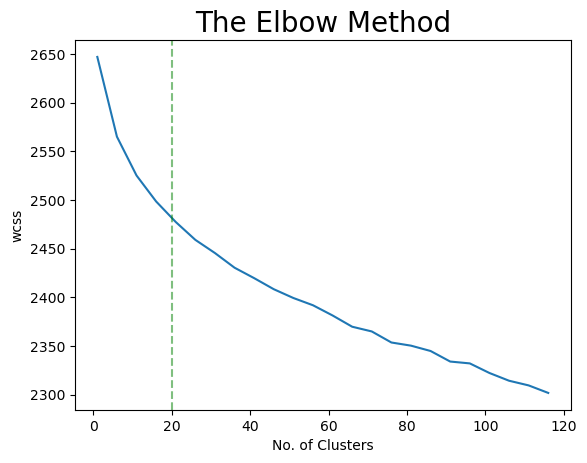

In [93]:
## Trovare il numero di clusters migliore per l'algoritmo K-MEANS attraverso l'elbow method
wcss = []
for i in range(1, 121, 5):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(matrice_ratings_normalizzata) 
    wcss.append(km.inertia_)

plt.plot(range(1, 121, 5), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.axvline(x=20, color='g', linestyle='--', alpha=0.5, label='x=20')

In [113]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_means = kmeans.fit_predict(matrice_ratings_normalizzata)
clusters = y_means

In [115]:
user_ids = dataset_filtrato['user_id'].unique() 
cluster_mapping = pd.DataFrame({
    'user_id': user_ids,
    'cluster': clusters
})

In [117]:
cluster_mapping

,user_id,cluster
0,AE7BV6IMNPZ3F266H7PXMH3BZQNQ,0
1,AGTMZCWIWBH43TCW7UKG2YV2EKKA,10
2,AGWDYYVVWM3DC3CASUZKXK67G6IA,6
3,AGQCLGY54KOYF7D7A5W7K46JQHXQ,0
4,AE5VPKX64CVOPH6X75C7EQXAIGLA,9
...,...,...
2680,AHYIIJI6TNWY6W3MIEJZOADB4LWQ,9
2681,AEV4BTCQALPMAIO4SSZVKNQZ3MQQ,12
2682,AE75T3R6KTKQI6OJH5QMOGLXUZ2A,9
2683,AG2TRQF2I5XIVFV367JTJ7IUN6XQ,18


In [129]:
cluster_mapping['cluster'].value_counts()

cluster
9     502
18    216
0     195
14    193
8     183
6     175
2     156
5     137
13    115
10    110
11     91
16     90
4      83
15     83
1      76
3      68
7      61
17     54
19     51
12     46
Name: count, dtype: int64

In [131]:
## Rating Prediction with Matrix Factorization (SVD)
from surprise import SVD

In [133]:
algo_svd = SVD()
trainset, testset = model_selection.train_test_split(dataset_surprise, test_size = 0.2, random_state = 1)

In [135]:
algo_svd.fit(trainset)
predictions = algo_svd.test(testset)

mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

MSE: 0.8168
RMSE: 0.9038


In [137]:
param_grid = {
    'n_factors' : list(range(80, 160, 10)),
    'n_epochs' : list(range(10, 50, 10)),
    'biased' : [True, False]
}

gs = model_selection.GridSearchCV(SVD, param_grid, measures = ['mse', 'rmse'], cv = 5, n_jobs = -1)
gs.fit(dataset_surprise)
# best RMSE score
print(f'Best MSE = {gs.best_score["mse"]:.4f}')
print(f'Best RMSE = {gs.best_score["rmse"]:.4f}')
# combination of parameters that gave the best RMSE score
print(f'Best configuration = {gs.best_params["rmse"]}')

Best MSE = 0.8064
Best RMSE = 0.8980
Best configuration = {'n_factors': 90, 'n_epochs': 30, 'biased': True}


In [249]:
## Abbiamo trovato la configuraione ottimale quindi adesso la utilizziamo per applicare l'algoritmo SVD 
trainset = dataset_surprise.build_full_trainset()
algo_svd = SVD(n_factors = 90, n_epochs = 30, biased = True)
algo_svd.fit(trainset);

In [251]:
## Predire tutti i prodotti per un utente specifico
uid = "AGTMZCWIWBH43TCW7UKG2YV2EKKA"
items_id = dataset_filtrato['parent_asin'].unique()
items_pred_svd = []
for iid in items_id:
    if matrice_ratings_filtrato.at[uid, iid] > 0:
        items_pred_svd.append(0)
    else:
        res = algo_svd.predict(uid, iid)
        items_pred_svd.append(res.est)

items_pred_svd = np.array(items_pred_svd)

In [253]:
items_id

array(['B00MA7GABO', 'B000002IAI', 'B000002LJZ', ..., 'B000WCDI6O',
       'B000000OW6', 'B000003C4I'], dtype=object)

In [255]:
items_pred_svd

array([4.94541845, 4.62819712, 4.00677633, ..., 4.87991552, 5.        ,
       4.5854805 ])

In [257]:
# Sort the items by the highest score
idxs_sorted = np.argsort(items_pred_svd) 
idxs_sorted = idxs_sorted[::-1] 
items_pred_svd = items_pred_svd[idxs_sorted] 
rec_list = items_id[idxs_sorted] 

print(f"Top 10 items recommended: {rec_list[:10]}")
print(f"Scores: {items_pred_svd[:10]}")

Top 10 items recommended: ['B000001FKY' 'B000000WJI' 'B00004YNGE' 'B000002LRT' 'B000002LRR'
 'B0018CU8O2' 'B000002KXX' 'B00009N1ZV' 'B00000JFV9' 'B00004Y6NV']
Scores: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [259]:
# Associate the ids to the titles
print(f"Recommendations for user with id={uid}:\n")
for i, iid in enumerate(rec_list[:10]):
  title = dataset_filtrato.loc[dataset_filtrato["parent_asin"] == iid, "parent_asin"].values[0]
  print(f"{i + 1}. [s={items_pred_svd[i]:.2f}] {title}")

Recommendations for user with id=AGTMZCWIWBH43TCW7UKG2YV2EKKA:

1. [s=5.00] B000001FKY
2. [s=5.00] B000000WJI
3. [s=5.00] B00004YNGE
4. [s=5.00] B000002LRT
5. [s=5.00] B000002LRR
6. [s=5.00] B0018CU8O2
7. [s=5.00] B000002KXX
8. [s=5.00] B00009N1ZV
9. [s=5.00] B00000JFV9
10. [s=5.00] B00004Y6NV


In [261]:
# Fill all the missing values in the rating matrix
users_id = dataset_filtrato["user_id"].unique()
items_id = dataset_filtrato["parent_asin"].unique()
filled_rating_matrix_factorization = []
for uid in users_id:
  filled_rating_matrix_factorization.append([])
  for iid in items_id:
      if matrice_ratings_filtrato.at[uid, iid] > 0 :
          filled_rating_matrix_factorization[-1].append(0)
      else:
          res = algo_svd.predict(uid=uid, iid=iid)
          filled_rating_matrix_factorization[-1].append(res.est)

filled_rating_matrix_factorization = np.array(filled_rating_matrix_factorization)

In [263]:
# Create the recommendation list for each user
res_df = pd.DataFrame(filled_rating_matrix_factorization)
res_df.columns = items_id
res_df = res_df.set_index(users_id)
res_df

,B00MA7GABO,B000002IAI,B000002LJZ,B000002J0N,B00000ICNY,B01BGDXOFC,B0034CNSFU,B000NY17J6,B015EYVWPI,B000026C3T,...,B000002I6T,B000068TND,B000BJS4P8,B0000B3FCX,B0000060ZW,B00000JJ2R,B0000009T2,B000WCDI6O,B000000OW6,B000003C4I
AE7BV6IMNPZ3F266H7PXMH3BZQNQ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.680843,4.177383,3.616346,3.818900,4.496164,3.998002,4.997756,4.616081,4.957492,4.163503
AGTMZCWIWBH43TCW7UKG2YV2EKKA,4.945418,4.628197,4.006776,5.000000,4.979477,5.000000,5.000000,4.966991,4.910419,4.970117,...,5.000000,4.543740,3.777428,4.147537,4.680172,4.367199,5.000000,4.879916,5.000000,4.585481
AGWDYYVVWM3DC3CASUZKXK67G6IA,5.000000,4.781626,4.554470,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.858320,3.929551,4.323586,5.000000,4.638175,5.000000,4.965864,5.000000,4.747292
AGQCLGY54KOYF7D7A5W7K46JQHXQ,5.000000,4.507919,4.110846,5.000000,4.945703,5.000000,0.000000,5.000000,4.886812,5.000000,...,5.000000,4.507124,3.692917,4.060386,4.712686,4.562145,5.000000,4.850859,5.000000,4.627109
AE5VPKX64CVOPH6X75C7EQXAIGLA,4.107193,0.000000,3.109371,4.205915,0.000000,4.394959,4.152572,4.052695,4.104353,4.208888,...,4.081149,3.726761,3.062330,3.280117,3.986915,3.683351,4.518143,3.867973,4.395980,3.778476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHYIIJI6TNWY6W3MIEJZOADB4LWQ,4.540711,4.274180,4.188071,4.891572,4.669668,4.832182,4.839292,4.709163,4.685553,4.756815,...,4.598264,4.360319,3.681485,3.570783,4.496779,4.142291,4.856930,4.498533,4.926973,4.243200
AEV4BTCQALPMAIO4SSZVKNQZ3MQQ,4.341554,3.612695,3.639996,4.302172,4.221755,4.353592,4.104171,4.288083,4.106037,4.560101,...,4.298137,3.706950,3.045995,3.630936,4.090562,3.684865,4.357670,3.976369,4.502711,3.887313
AE75T3R6KTKQI6OJH5QMOGLXUZ2A,4.322131,3.571419,3.240636,4.352580,4.086445,4.241468,4.221976,4.136012,4.013319,4.185202,...,4.198973,3.856131,2.958707,3.354633,3.663690,3.686561,4.493093,4.023025,4.400864,3.498176
AG2TRQF2I5XIVFV367JTJ7IUN6XQ,4.304980,3.748813,3.392463,4.154987,4.091064,4.597610,4.217679,4.291121,4.010601,4.161914,...,4.247863,3.968676,2.850366,3.249286,3.883921,3.727763,4.103289,4.188562,4.573105,3.856665


In [265]:
## Creazione per ogni utente della lista degli n items da consigliare 
def sort_columns(row):
  sorted_columns = sorted(row.items(), key=lambda x: x[1], reverse=True)
  return [col[0] for col in sorted_columns]

rec_lists = pd.DataFrame(list(res_df.apply(sort_columns, axis=1)),
                         index=res_df.index)
rec_lists

,0,1,2,3,4,5,6,7,8,9,...,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443
AE7BV6IMNPZ3F266H7PXMH3BZQNQ,B00000J2PH,B0000028M7,B000028U0Y,B000000OAA,B000002L9M,B00004Y6NX,B0025KVLSS,B000002LND,B000002GWB,B000002MG1,...,B00000331T,B00009Z570,B00007KWHN,B000002KD3,B00005MLVA,B0000DG05T,B000002KEP,B003NWS5FO,B000CNE11O,B000A7Q27I
AGTMZCWIWBH43TCW7UKG2YV2EKKA,B000002J0N,B01BGDXOFC,B0034CNSFU,B000002OO0,B005MQNDVK,B00005MLVA,B000002KEP,B000CNE11O,B00006EXLQ,B000001FX1,...,B0002ZYEKA,B00002MZ41,B00064ADRK,B00007KQ70,B0000V19LS,B0000DFZZA,B00006OFTZ,B0000C6E4D,B0000AGWEC,B000089RVU
AGWDYYVVWM3DC3CASUZKXK67G6IA,B00MA7GABO,B000002J0N,B00000ICNY,B01BGDXOFC,B0034CNSFU,B000NY17J6,B015EYVWPI,B000026C3T,B000002OO0,B000002B30,...,B00009V7P8,B00005OWEJ,B000002NHN,B00006IR5V,B00001QGQI,B00006J3UT,B00005YW4H,B00005YXZI,B00005AXEL,B00005S7UE
AGQCLGY54KOYF7D7A5W7K46JQHXQ,B00MA7GABO,B000002J0N,B01BGDXOFC,B000NY17J6,B000026C3T,B000002OO0,B000002B30,B000T2PRKC,B000002LV3,B000002KEP,...,B00005NBZB,B000001DUK,B0009MAPUY,B00KIZ9F8K,B000002KET,B00BEXB18M,B000002KE2,B00AA0TZTW,B00004HYKZ,B00003002E
AE5VPKX64CVOPH6X75C7EQXAIGLA,B000005H7D,B000000OV7,B000063DFQ,B00000255F,B00004YLAU,B000000XDJ,B0000013GB,B00004BZ0N,B000002LPW,B000002G23,...,B000002GVZ,B0001XANAS,B000000OU0,B000002ON9,B000000OPC,B003XMUFGQ,B000002KER,B000063NE0,B000002KIN,B00006ALR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHYIIJI6TNWY6W3MIEJZOADB4LWQ,B0000028M7,B000002JSN,B000028U0Y,B000000OAN,B000002LK1,B000000XB9,B000002GW7,B000002LBH,B000002U82,B000001DTM,...,B00006J6VG,B0009W5IV0,B000BKSITO,B000IU3YLY,B00008OWZG,B00005RTG8,B0002XVS1K,B000G04RLM,B000002IZC,B000002J98
AEV4BTCQALPMAIO4SSZVKNQZ3MQQ,B00000ADLF,B000002H72,B00004U2G4,B000003BDJ,B000002TQV,B00005AWMF,B00000J2PH,B000050IE6,B000000LZS,B00006FSST,...,B00004XOWM,B0002XVS1K,B00005RTG8,B000G04RLM,B000BKSITO,B0007P3582,B00021LRWM,B00018Y0QQ,B0001ZMXEA,B00009V7RF
AE75T3R6KTKQI6OJH5QMOGLXUZ2A,B00004BZ04,B000002UEB,B000002P5U,B00000HZG9,B000025XKM,B0002JEO74,B000050IE6,B00005NGZX,B000001FS3,B000000OUJ,...,B0007P3582,B0002XVS1K,B000G04RLM,B000002UDB,B0000C1733,B000078DOI,B000067CPX,B000002LQR,B000002MTR,B000065V1W
AG2TRQF2I5XIVFV367JTJ7IUN6XQ,B000002LRJ,B000002P5Y,B00004YLAU,B000002OX7,B000000H5J,B0000029GA,B000000OUJ,B000003BX3,B000001FFJ,B00001SVM6,...,B0002XVS1K,B00005RTG8,B0000CD5F1,B0007P3582,B000G04RLM,B00009YXGH,B0002ABUUC,B00004BZ04,B0006213WG,B00008J2QB


In [ ]:
## Algoritmo SVD ottimizzato
    #Best MSE = 0.8064
    #Best RMSE = 0.8980
    #Best configuration = {'n_factors': 90, 'n_epochs': 30, 'biased': True}
## Algoritmo KNN ottimizzato
    #Best MSE = 0.8623
    #Best RMSE = 0.9286
    #Best configuration = {'k': 24, 'sim_options': {'name': 'msd', 'user_based': False}}